# IMPORTING LIBRARIES

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# IMPORTING DATA

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# ANALYSING DATA

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.duplicated('CustomerId').sum()

0

In [9]:
df = df.set_index('CustomerId')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.replace({'Geography': {'France': 2,'Germany' : 1, 'Spain': 0}},inplace=True )


In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.replace({'Gender': {'Male': 0, 'Female':1}},inplace=True)

In [15]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [16]:
df.replace({'Num Of Products': {1: 0,2:1,3:1,4:1}},inplace=True)

In [17]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [18]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [19]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [20]:
df['Zero Balance'] =np.where(df['Balance']>0,1,0)

<AxesSubplot:>

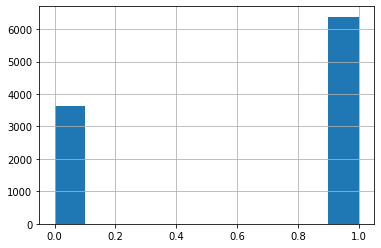

In [21]:
df['Zero Balance'].hist()

In [22]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# DEFINE LABEL AND FEATURES

In [23]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [24]:
X = df.drop(['Surname', 'Churn'],axis =1)

In [25]:
y = df['Churn']

In [26]:
X.shape,y.shape

((10000, 11), (10000,))

In [27]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

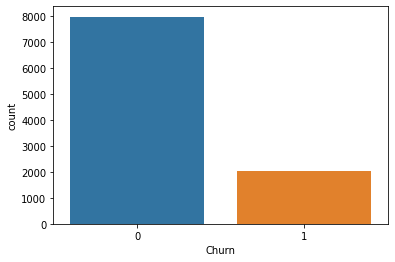

In [28]:
sns.countplot(x = 'Churn', data =df);

In [29]:
X.shape,y.shape

((10000, 11), (10000,))

# RANDOM UNDER SAMPLING

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus =RandomUnderSampler(random_state=132529)

In [32]:
X_rus, y_rus = rus.fit_resample(X,y)

In [33]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [34]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [35]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

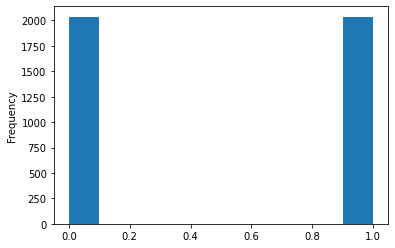

In [36]:
y_rus.plot(kind ='hist')

# RANDOM OVER SAMPLING

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros = RandomUnderSampler(random_state=132529)

In [39]:
X_ros, y_ros = ros.fit_resample(X,y)

In [40]:
X_ros.shape, y_ros.shape, X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [41]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

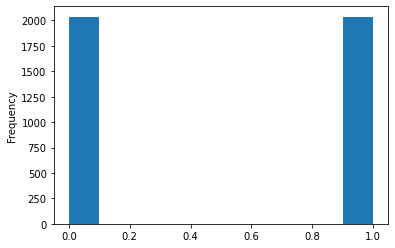

In [42]:
y_ros.plot(kind ='hist')

# TRAIN TEST SPLIT

In [44]:
from sklearn.model_selection import train_test_split

# SPLIT ORIGINAL DATA

In [46]:
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.3,random_state =132529)

# SPLIT RANDOM UNDER SAMPLE DATA

In [47]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size=0.7)

# SPLIT RANDOM OVER SAMPLE DATA

In [48]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros,y_ros, test_size=0.7)

# STANDARDIZE FEATURES

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc= StandardScaler()

# STANDARDIZE ORIGINAL DATA

In [51]:
X_train[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [52]:
X_test[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# STANDARDIZE RANDOM UNDER SAMPLE DATA

In [54]:
X_train_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [55]:
X_test_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


# STANDARDIZE RANDOM OVER SAMPLE DATA

In [56]:
X_train_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [57]:
X_test_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


# SUPPORT VECTOR MACHINE CLASSIFIER

In [58]:
from sklearn.svm import SVC


In [59]:
svc =SVC()

In [62]:
svc.fit(X_train,y_train)

SVC()

In [61]:
y_pred = svc.predict(X_test)

# MODEL ACCURACY

In [63]:
from sklearn.metrics import confusion_matrix, classification_report


In [64]:
confusion_matrix(y_test, y_pred)

array([[2323,   46],
       [ 472,  159]], dtype=int64)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2369
           1       0.78      0.25      0.38       631

    accuracy                           0.83      3000
   macro avg       0.80      0.62      0.64      3000
weighted avg       0.82      0.83      0.79      3000



# HYPER PARAMETER TUNNING

In [66]:
from sklearn.model_selection import GridSearchCV


In [67]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}


In [68]:
grid = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [69]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [70]:
grid_predictions = grid.predict(X_test)

In [71]:
confusion_matrix(y_test,grid_predictions)

array([[2130,  239],
       [ 401,  230]], dtype=int64)

In [72]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2369
           1       0.49      0.36      0.42       631

    accuracy                           0.79      3000
   macro avg       0.67      0.63      0.64      3000
weighted avg       0.77      0.79      0.77      3000



# MODEL WITH RANDOM UNDER SAMPLING

In [73]:
svc_rus =SVC()

In [74]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [75]:
svc.predict(X_test_rus)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# MODEL ACCURACY

In [ ]:
confusion_matrix(y_test_rus,y_pred_rus)

In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

# HYPER PARAMETER TUNNING

In [78]:

param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}

In [79]:
grid_rus = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_rus.fit(X_train,y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [80]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [81]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [82]:
confusion_matrix(y_test_rus,grid_rus.predict(X_test_rus))

array([[1422,   28],
       [ 295, 1107]], dtype=int64)

In [83]:
print(classification_report(y_test_rus,grid_predictions_rus))
            

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1450
           1       0.98      0.79      0.87      1402

    accuracy                           0.89      2852
   macro avg       0.90      0.89      0.89      2852
weighted avg       0.90      0.89      0.89      2852



# MODEL WITH RANDOM OVER SAMPLING

In [84]:
svc_ros = SVC()

In [85]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [86]:
y_pred_ros = svc_ros.predict(X_test_ros)

# MODEL ACCURACY

In [87]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1076,  347],
       [ 414, 1015]], dtype=int64)

In [88]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1423
           1       0.75      0.71      0.73      1429

    accuracy                           0.73      2852
   macro avg       0.73      0.73      0.73      2852
weighted avg       0.73      0.73      0.73      2852



# HYPER PARAMETER TUNNING

In [89]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}


In [90]:
grid_ros = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_ros.fit(X_train,y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [91]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [92]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [93]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[1391,   32],
       [ 300, 1129]], dtype=int64)

In [94]:
print(classification_report(y_test_ros,grid_predictions_ros))
   

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1423
           1       0.97      0.79      0.87      1429

    accuracy                           0.88      2852
   macro avg       0.90      0.88      0.88      2852
weighted avg       0.90      0.88      0.88      2852



# LETS COMPARE

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2369
           1       0.78      0.25      0.38       631

    accuracy                           0.83      3000
   macro avg       0.80      0.62      0.64      3000
weighted avg       0.82      0.83      0.79      3000



In [96]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2369
           1       0.49      0.36      0.42       631

    accuracy                           0.79      3000
   macro avg       0.67      0.63      0.64      3000
weighted avg       0.77      0.79      0.77      3000



In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

In [98]:
print(classification_report(y_test_rus,grid_predictions_rus))
       

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1450
           1       0.98      0.79      0.87      1402

    accuracy                           0.89      2852
   macro avg       0.90      0.89      0.89      2852
weighted avg       0.90      0.89      0.89      2852



In [99]:
print(classification_report(y_test_ros,y_pred_ros))
  

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1423
           1       0.75      0.71      0.73      1429

    accuracy                           0.73      2852
   macro avg       0.73      0.73      0.73      2852
weighted avg       0.73      0.73      0.73      2852



In [100]:
print(classification_report(y_test_ros,grid_predictions_ros))
    

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1423
           1       0.97      0.79      0.87      1429

    accuracy                           0.88      2852
   macro avg       0.90      0.88      0.88      2852
weighted avg       0.90      0.88      0.88      2852

